## Кластеризация филиалов сети магазинов

#### Описание данных  
  Руководство сети магазинов желает разделить филиалы на группы с тем, чтобы затем сравнить продажи в разных группах. Данный анализ может помочь в выборе направления развития и оптимизации сети.Часть переменных представлена в текстовом виде. Дополнительно к задаче, было бы неплохо добавить новые переменные,например, «вывеска+витрина»

#### Описание переменных
* Название - Условный код филиала
* Площадь - Площадь торгового зала, кв.м.
* Проходим - Проходимость, ср. кол-во входящих в магазин за 10 минут(с 14-00 до 18-00)
* Ассортим - Ассортимент (текстовая переменная!)
* Конкурен - Как выглядит филиал по совокупности показателей по отношению к ближайшему конкуренту (текстовая переменная!)
* Метро - За сколько минут можно дойти до ближайшей станции метро
* Консульт - Наличие в торговом зале консультантов (текстовая переменная!)
* Дизайн - Наличие или отсутствие следующих компонентов: вывеска, витрина, световая вывеска (текстовая переменная!)
* Цены - Индекс цен по отношению к базовым.
* Продажи - Совокупные продажи за 2 последних месяца

#### Задача
1. Пользуясь кластерным анализом разделить магазины на группы.
2. Охарактеризовать каждую группу.
3. Сравнить полученные группы по уровню продаж – это означает, что при
классификации надо исключить переменную «продажи» из списка
переменных, используемых при анализе.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn

In [2]:
df_branches = pd.read_csv('branch.dat', sep = ';', encoding = 'cp1251')

In [3]:
df_branches.head()

,НАЗВАНИЕ,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
0,Филиал 1,120,42,миним,лучше,5,Есть,Вывеска,1.00,49000
1,Филиал 2,80,18,средний,одинак,20,Нет,Витрина,0.95,24000
2,Филиал 3,240,54,макс,одинак,10,Есть,Св+Ви,1.05,125000
3,Филиал 4,160,57,средний,одинак,30,Нет,Световая,1.00,85000
4,Филиал 5,270,68,широкий,лучше,15,Есть,Св+Ви,1.05,130000


**Редактируем табицу**

In [4]:
df_branches.index = df_branches['НАЗВАНИЕ']

In [5]:
df_branches = df_branches.drop('НАЗВАНИЕ', axis = 1)

In [6]:
for column in df_branches.columns:
    if df_branches[column].dtype == 'object':
        df_branches[column] = df_branches[column].str.strip()
        df_branches[column] = df_branches[column].str.lower()

In [7]:
assortment = {'миним':'0','средний':'1','широкий':'2','макс':'3'}
df_branches['АССОРТИМ'] = df_branches['АССОРТИМ'].map(assortment)

In [8]:
df_branches.head()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,0,лучше,5,есть,вывеска,1.00,49000
Филиал 2,80,18,1,одинак,20,нет,витрина,0.95,24000
Филиал 3,240,54,3,одинак,10,есть,св+ви,1.05,125000
Филиал 4,160,57,1,одинак,30,нет,световая,1.00,85000
Филиал 5,270,68,2,лучше,15,есть,св+ви,1.05,130000


In [9]:
opponent = {'хуже':'-1','одинак':'0','лучше':'1'}
df_branches['КОНКУРЕН'] = df_branches['КОНКУРЕН'].map(opponent) 
df_branches

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,0,1,5,есть,вывеска,1.00,49000
Филиал 2,80,18,1,0,20,нет,витрина,0.95,24000
Филиал 3,240,54,3,0,10,есть,св+ви,1.05,125000
Филиал 4,160,57,1,0,30,нет,световая,1.00,85000
Филиал 5,270,68,2,1,15,есть,св+ви,1.05,130000
Филиал 6,100,28,1,0,10,есть,вывеска,0.95,42000
Филиал 7,130,20,1,-1,5,есть,бедно,1.00,40000
Филиал 8,310,66,3,1,25,есть,св+ви,0.90,153000
Филиал 9,140,38,1,1,10,нет,св+ви,1.00,60000


In [10]:
consult = {'нет':'0','есть':'1'}
df_branches['КОНСУЛЬТ'] = df_branches['КОНСУЛЬТ'].map(consult) 
df_branches.head()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
НАЗВАНИЕ,,,,,,,,,
Филиал 1,120,42,0,1,5,1,вывеска,1.00,49000
Филиал 2,80,18,1,0,20,0,витрина,0.95,24000
Филиал 3,240,54,3,0,10,1,св+ви,1.05,125000
Филиал 4,160,57,1,0,30,0,световая,1.00,85000
Филиал 5,270,68,2,1,15,1,св+ви,1.05,130000


In [11]:
df_branches['ДИЗАЙН'].unique()

array(['вывеска', 'витрина', 'св+ви', 'световая', 'бедно', 'вы+ви'],
      dtype=object)

In [12]:
df_branches['ВЫВЕСКА'] = df_branches['ДИЗАЙН'].str.contains('вы').map({True:1, False:0})
df_branches['ВИТРИНА'] = df_branches['ДИЗАЙН'].str.contains('ви').map({True:1, False:0})
df_branches['СВЕТОВАЯ'] = df_branches['ДИЗАЙН'].str.contains('св').map({True:1, False:0})
df_branches = df_branches.drop('ДИЗАЙН', axis = 1)

In [13]:
df_branches.dtypes

ПЛОЩАДЬ       int64
ПРОХОДИМ      int64
АССОРТИМ     object
КОНКУРЕН     object
МЕТРО         int64
КОНСУЛЬТ     object
ЦЕНЫ        float64
ПРОДАЖИ       int64
ВЫВЕСКА       int64
ВИТРИНА       int64
СВЕТОВАЯ      int64
dtype: object

In [14]:
df_branches['АССОРТИМ'] = pd.to_numeric(df_branches['АССОРТИМ'])
df_branches['КОНКУРЕН'] = pd.to_numeric(df_branches['КОНКУРЕН'])
df_branches['КОНСУЛЬТ'] = pd.to_numeric(df_branches['КОНСУЛЬТ'])
df_branches.dtypes

ПЛОЩАДЬ       int64
ПРОХОДИМ      int64
АССОРТИМ      int64
КОНКУРЕН      int64
МЕТРО         int64
КОНСУЛЬТ      int64
ЦЕНЫ        float64
ПРОДАЖИ       int64
ВЫВЕСКА       int64
ВИТРИНА       int64
СВЕТОВАЯ      int64
dtype: object

In [15]:
df_branches.describe()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,163.500000,39.350000,1.450000,0.050000,15.250000,0.550000,0.990000,62150.000000,0.35000,0.600000,0.300000
std,64.585724,15.934983,0.998683,0.759155,9.101041,0.510418,0.057583,38386.229713,0.48936,0.502625,0.470162
min,80.000000,18.000000,0.000000,-1.000000,5.000000,0.000000,0.900000,22000.000000,0.00000,0.000000,0.000000
25%,117.500000,27.000000,1.000000,-0.250000,8.750000,0.000000,0.950000,35000.000000,0.00000,0.000000,0.000000
50%,150.000000,38.500000,1.000000,0.000000,15.000000,1.000000,1.000000,45500.000000,0.00000,1.000000,0.000000
75%,195.000000,54.250000,2.000000,1.000000,21.250000,1.000000,1.000000,85250.000000,1.00000,1.000000,1.000000
max,310.000000,68.000000,3.000000,1.000000,35.000000,1.000000,1.100000,153000.000000,1.00000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'ПЛОЩАДЬ'}>,
        <AxesSubplot:title={'center':'ПРОХОДИМ'}>,
        <AxesSubplot:title={'center':'АССОРТИМ'}>],
       [<AxesSubplot:title={'center':'КОНКУРЕН'}>,
        <AxesSubplot:title={'center':'МЕТРО'}>,
        <AxesSubplot:title={'center':'КОНСУЛЬТ'}>],
       [<AxesSubplot:title={'center':'ЦЕНЫ'}>,
        <AxesSubplot:title={'center':'ПРОДАЖИ'}>,
        <AxesSubplot:title={'center':'ВЫВЕСКА'}>],
       [<AxesSubplot:title={'center':'ВИТРИНА'}>,
        <AxesSubplot:title={'center':'СВЕТОВАЯ'}>, <AxesSubplot:>]],
      dtype=object)

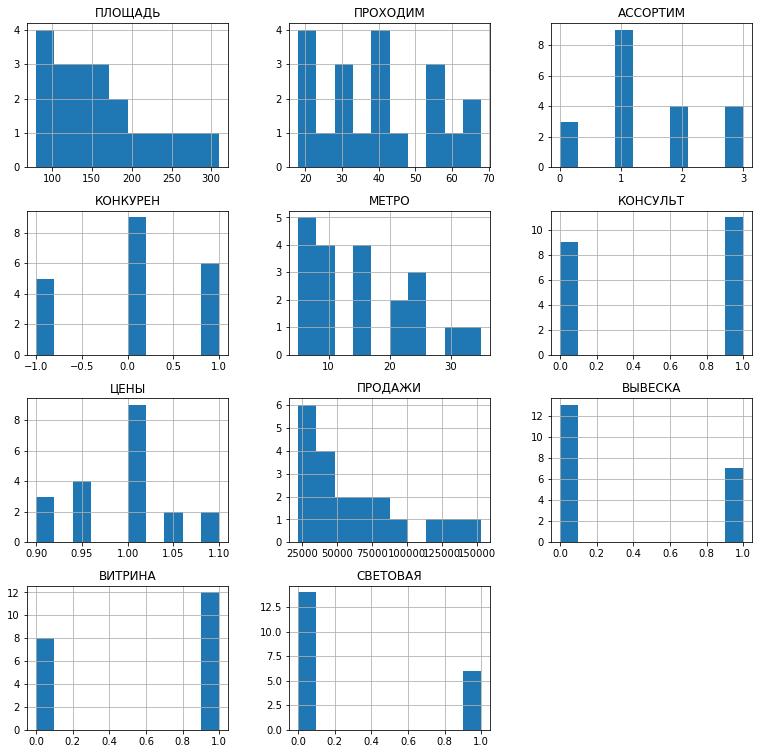

In [16]:
df_branches.hist(figsize = (13, 13))

### Проводим стандартизацию

Стандартизируем данные чтобы каждый параметр имел одинаковый вес (?). Также, метод главных компонент использует дисперсии, а для них важно чтобы у параметров была одинаковая размерность.

In [17]:
df_branches.head()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ
НАЗВАНИЕ,,,,,,,,,,,
Филиал 1,120,42,0,1,5,1,1.00,49000,1,0,0
Филиал 2,80,18,1,0,20,0,0.95,24000,0,1,0
Филиал 3,240,54,3,0,10,1,1.05,125000,0,1,1
Филиал 4,160,57,1,0,30,0,1.00,85000,0,0,1
Филиал 5,270,68,2,1,15,1,1.05,130000,0,1,1


In [18]:
from sklearn import preprocessing

stand = preprocessing.StandardScaler()

df_stand = stand.fit_transform(df_branches)

df_stand = pd.DataFrame(df_stand, index = df_branches.index, columns = df_branches.columns)

In [19]:
df_stand.head()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ
НАЗВАНИЕ,,,,,,,,,,,
Филиал 1,-0.691020,0.170621,-1.489630,1.283901,-1.155503,0.904534,0.178174,-0.351470,1.362770,-1.224745,-0.654654
Филиал 2,-1.326442,-1.374626,-0.462299,-0.067574,0.535477,-1.105542,-0.712697,-1.019664,-0.733799,0.816497,-0.654654
Филиал 3,1.215243,0.943244,1.592363,-0.067574,-0.591843,0.904534,1.069045,1.679840,-0.733799,0.816497,1.527525
Филиал 4,-0.055599,1.136400,-0.462299,-0.067574,1.662797,-1.105542,0.178174,0.610730,-0.733799,-1.224745,1.527525
Филиал 5,1.691809,1.844638,0.565032,1.283901,-0.028183,0.904534,1.069045,1.813479,-0.733799,0.816497,1.527525


### Проводим кластеризацию

#### Используем метод иерархической кластеризации

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [21]:
link = linkage(df_stand, 'ward', 'euclidean')
link

array([[ 5.        , 11.        ,  1.62505227,  2.        ],
       [ 2.        ,  4.        ,  2.06327187,  2.        ],
       [ 1.        , 16.        ,  2.24595464,  2.        ],
       [ 0.        , 13.        ,  2.57361035,  2.        ],
       [ 8.        ,  9.        ,  2.5856354 ,  2.        ],
       [10.        , 19.        ,  2.65756397,  2.        ],
       [ 6.        , 18.        ,  2.77731534,  2.        ],
       [12.        , 22.        ,  2.79150121,  3.        ],
       [17.        , 27.        ,  3.5770671 ,  4.        ],
       [20.        , 26.        ,  3.80818419,  4.        ],
       [ 7.        , 14.        ,  3.81587686,  2.        ],
       [ 3.        , 24.        ,  4.27090433,  3.        ],
       [23.        , 29.        ,  4.50535542,  6.        ],
       [15.        , 21.        ,  4.84555497,  3.        ],
       [28.        , 31.        ,  5.60083274,  7.        ],
       [30.        , 33.        ,  5.93772597,  5.        ],
       [25.        , 32.

**Строим дендрограмму**

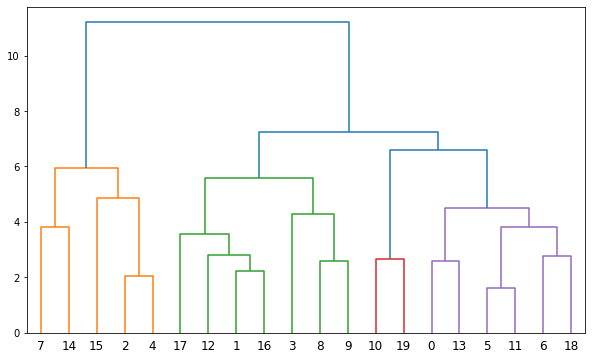

In [22]:
plt.figure(figsize = (10,6)) # Размер графика
dn_stand = dendrogram(link, color_threshold = 6.1)

**Используем метод локтя**

Text(12, 7.1, '3 clusters')

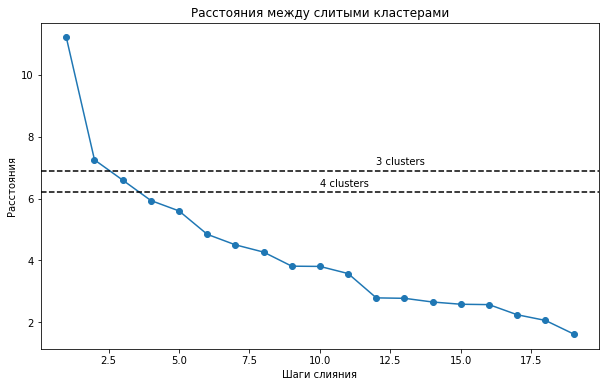

In [23]:
plt.figure(figsize = (10,6)) # Размер графика
dist_rev = link[:, 2][::-1] # Отсортировали расстояния по убыванию
idxs = range(1, len(link[:, 2]) + 1) # Создали индексы от 1 до 17 (включительно)
plt.plot(idxs, dist_rev, marker = 'o') # Нарисовали график (выделили точки)
plt.title('Расстояния между слитыми кластерами') # Заголовок графика
plt.xlabel('Шаги слияния') # Подпись оси Х
plt.ylabel('Расстояния') # Подпись оси Y
plt.axhline(6.2, c = 'k', linestyle = 'dashed') # Добавили нижнюю пунктирную линию
plt.axhline(6.9, c = 'k', linestyle = 'dashed') # Добавили верхнюю пунктирную линию
plt.text(10, 6.4, '4 clusters') # Подписали нижнюю пунктирную линию
plt.text(12, 7.1, '3 clusters') # Подписали верхнюю пунктирную линию

In [24]:
df_branches['Кластер'] = fcluster(link, 4, criterion = 'maxclust')
df_branches

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ,Кластер
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,1,5,1,1.00,49000,1,0,0,4
Филиал 2,80,18,1,0,20,0,0.95,24000,0,1,0,2
Филиал 3,240,54,3,0,10,1,1.05,125000,0,1,1,1
Филиал 4,160,57,1,0,30,0,1.00,85000,0,0,1,2
Филиал 5,270,68,2,1,15,1,1.05,130000,0,1,1,1
Филиал 6,100,28,1,0,10,1,0.95,42000,1,0,0,4
Филиал 7,130,20,1,-1,5,1,1.00,40000,0,0,0,4
Филиал 8,310,66,3,1,25,1,0.90,153000,0,1,1,1
Филиал 9,140,38,1,1,10,0,1.00,60000,0,1,1,2


**Сохраняем значения для последующих исследований**

In [25]:
df_hierarch_stand = df_stand.copy()
clusters_hierarch = df_branches['Кластер'].copy()

**Анализируем получившиеся кластеры**

In [26]:
df_branches.groupby('Кластер').mean()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ
Кластер,,,,,,,,,,,
1,250.000000,60.200000,2.800000,0.200000,16.0,1.0,1.000000,117800.000000,0.200000,0.800000,0.600000
2,142.857143,36.285714,1.428571,0.142857,15.0,0.0,1.000000,47857.142857,0.142857,0.857143,0.428571
3,110.000000,29.500000,0.000000,-1.000000,30.0,0.0,0.925000,35000.000000,0.500000,0.000000,0.000000
4,133.333333,28.833333,0.833333,0.166667,10.0,1.0,0.991667,41500.000000,0.666667,0.333333,0.000000


In [27]:
df_branches.groupby('Кластер').size()

Кластер
1    5
2    7
3    2
4    6
dtype: int64

In [28]:
df_branches.groupby('Кластер')['ПЛОЩАДЬ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,250.000000,47.434165,180.0,240.0,250.0,270.0,310.0
2,7.0,142.857143,42.314019,80.0,120.0,140.0,165.0,210.0
3,2.0,110.000000,14.142136,100.0,105.0,110.0,115.0,120.0
4,6.0,133.333333,39.327683,90.0,105.0,125.0,160.0,190.0


In [29]:
df_branches.groupby('Кластер')['АССОРТИМ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,2.800000,0.447214,2.0,3.0,3.0,3.0,3.0
2,7.0,1.428571,0.534522,1.0,1.0,1.0,2.0,2.0
3,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,6.0,0.833333,0.408248,0.0,1.0,1.0,1.0,1.0


In [30]:
df_branches.groupby('Кластер')['КОНКУРЕН'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,0.200000,0.836660,-1.0,0.0,0.0,1.00,1.0
2,7.0,0.142857,0.690066,-1.0,0.0,0.0,0.50,1.0
3,2.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.00,-1.0
4,6.0,0.166667,0.752773,-1.0,0.0,0.0,0.75,1.0


In [31]:
df_branches.groupby('Кластер')['МЕТРО'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,16.0,8.944272,5.0,10.0,15.0,25.00,25.0
2,7.0,15.0,8.164966,5.0,10.0,15.0,17.50,30.0
3,2.0,30.0,7.071068,25.0,27.5,30.0,32.50,35.0
4,6.0,10.0,6.324555,5.0,5.0,7.5,13.75,20.0


In [32]:
df_branches.groupby('Кластер')['КОНСУЛЬТ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [33]:
df_branches.groupby('Кластер')['ЦЕНЫ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,1.000000,0.093541,0.90,0.9000,1.050,1.0500,1.10
2,7.0,1.000000,0.050000,0.95,0.9750,1.000,1.0000,1.10
3,2.0,0.925000,0.035355,0.90,0.9125,0.925,0.9375,0.95
4,6.0,0.991667,0.020412,0.95,1.0000,1.000,1.0000,1.00


In [34]:
df_branches.groupby('Кластер')['ВЫВЕСКА'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,0.200000,0.447214,0.0,0.00,0.0,0.00,1.0
2,7.0,0.142857,0.377964,0.0,0.00,0.0,0.00,1.0
3,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
4,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0


In [35]:
df_branches.groupby('Кластер')['ВИТРИНА'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,0.800000,0.447214,0.0,1.0,1.0,1.00,1.0
2,7.0,0.857143,0.377964,0.0,1.0,1.0,1.00,1.0
3,2.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
4,6.0,0.333333,0.516398,0.0,0.0,0.0,0.75,1.0


In [36]:
df_branches.groupby('Кластер')['СВЕТОВАЯ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,0.600000,0.547723,0.0,0.0,1.0,1.0,1.0
2,7.0,0.428571,0.534522,0.0,0.0,0.0,1.0,1.0
3,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [37]:
df_branches.groupby('Кластер').get_group(4)

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ,Кластер
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,1,5,1,1.00,49000,1,0,0,4
Филиал 6,100,28,1,0,10,1,0.95,42000,1,0,0,4
Филиал 7,130,20,1,-1,5,1,1.00,40000,0,0,0,4
Филиал 12,90,20,1,0,20,1,1.00,22000,1,0,0,4
Филиал 14,190,43,1,1,5,1,1.00,64000,1,1,0,4
Филиал 19,170,20,1,0,15,1,1.00,32000,0,1,0,4


In [38]:
df_branches.groupby('Кластер')['ПРОДАЖИ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
1,5.0,117800.000000,27252.522819,86000.0,95000.0,125000.0,130000.0,153000.0
2,7.0,47857.142857,22519.832529,24000.0,32000.0,37000.0,62500.0,85000.0
3,2.0,35000.000000,0.000000,35000.0,35000.0,35000.0,35000.0,35000.0
4,6.0,41500.000000,14390.969391,22000.0,34000.0,41000.0,47250.0,64000.0


По площади:  У первой группы самая большая площадь => самые большие магазины, у третьей - самая маленькая. Вторая и четвертая - примерно одинаковы.   
  По ассортименту: У самой третьей маленькой группы он везде низкий, и у четвертой низковатый. У первой - очень богатый. У второй - средний.    
  По конкурентоспособности: можно сказать, что у третьей группы очень низкая конкурентоспособность.   
  По расстоянию до метро: третья группа дальше всех. Остальные - примерно на одном уровне.   
  По консультантам: во второй и третьей группах их нет, в первой и четвертой - есть. Выводов не могу никаких сделать.   
  По ценам: в третьей самые низкие цены.   
  По вывескам, витринам и световым вывескам: в первой группе много у кого есть витрины, и у половины - световые вывески. Во второй - почти у всех есть витрины. В третьей группе - ток есть 1 вывеска. В четвертой группе, почти у большей части есть вывеска, у двух есть еще витрина, у одного магазина нет ничего.   
  По продажам: как и следовало ожидать, первая группа - топ, третья группа - дно, вторая и четвертая - чуть выше дна.   

#### Вывод:
В целом разбиение на группы примерно такое:
- Первая группа - гипермаркеты. Большая площадь, большой ассортимент, есть почти все из дизайна, ближе всех к метро.
- Вторая группа и четвертая - супермаркеты примерно одинаковые по площади, но вторая все-таки побольше и по ассортименту, за счет этого скорее всего и продажи чуть выше. Четвертую группу даже не спасает близость к метро и наличие консультантов.
- Третья группа - супермаркеты поменьше чем во второй и третьей группе, но по наполнению очень бедные. Ассортимент минимальный, от метро далеко, конкурентоспособность низкая и т.д. Поэтому и ниже продажи

#### Вопросы: 
- Зачем нужда стандартизация (ср. = 0, откл = 1)? - **просто чтобы данные были похожи на нормально распределенные**
- Насколько корректна визуализация после метода главных компонент? В чем вообще его смысл, ведь если раньше были хоть как-то интерпретируемые признаки, то после него вообще непонятно что откуда - **этот метод нужен в основном, чтобы посмотреть насколько корректно мы распределили кластеры, но какие-то выводы для бизнеса сделать не можем.**
- Как посмотреть какой вес имеет каждый признак при итоговой кластеризации (я думал что это изначально нужно задавать, а оказывается модель сама должна это считать нормально) - **математически это никак нельзя определить, поэтому какие-то коэффициенты найти нельзя. Только аналитически при рассмотрении кластеров по признакам.**

### Метод K-means

In [39]:
df_branches = df_branches.drop('Кластер', axis = 1)

**Подбираем количество кластеров методом локтя**

C:\Users\denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Метод локтя')

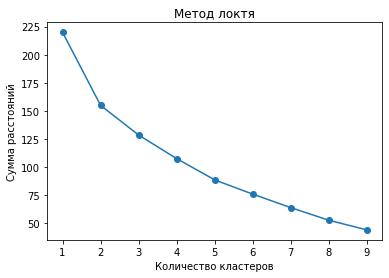

In [40]:
from sklearn.cluster import KMeans

models = [KMeans(n_clusters = k, random_state = 13).fit(df_stand) for k in range(1,10)]
dist = [model.inertia_ for model in models]

plt.plot(range(1,10), dist, marker = 'o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма расстояний')
plt.title('Метод локтя')

In [41]:
model = KMeans(n_clusters = 3, random_state = 13).fit(df_stand)
model.cluster_centers_

array([[ 1.13581527,  1.30809428,  1.07869754,  0.15767205,  0.34759026,
         0.56952143,  0.17817416,  1.34128863, -0.38437111,  0.13608276,
         0.80013226],
       [-0.84987576, -0.72004205, -0.97596444, -0.51806532,  0.15970364,
         0.23450882, -0.41573971, -0.66774881,  0.66391373, -1.22474487,
        -0.65465367],
       [-0.21445463, -0.44103917, -0.07704982,  0.27029495, -0.38047042,
        -0.60302269,  0.17817416, -0.50515487, -0.20965697,  0.81649658,
        -0.10910895]])

In [42]:
def square_polygons(df): 
    square_area = df * (len(df) - np.arange(len(df)))
    rectangle_1 = df * np.arange(len(df)) / 2
    rectangle_2 = (len(df) - df) * (len(df) - np.arange(len(df))) / 2
    return square_area + rectangle_1 + rectangle_2
    
def auto_clustering(dist, n_clusters=9, draw=True, method='kmeans'):
    # Sorted distances in descending order 
    dist_rev = dist[::-1]
    
    # limit the number of clusters
    dist_rev = dist_rev[:n_clusters]
    
    # Create range of point for draw
    idxs = range(1, len(dist_rev) + 1)    
        
    if method=='kmeans':
        dist_rev = dist
    # Standardize the x and y scale to be square and equal
    elbow_sq = -np.array(dist_rev) + dist_rev[0]
    elbow_sq = elbow_sq * (len(elbow_sq)) / elbow_sq[-1]

    # Calculate square of polygons
    square_poly = square_polygons(elbow_sq)

    # k-best - it is index point with biggest meaning of square
    k_best = np.where(square_poly == max(square_poly))[0][0] + 1

    # Set polygon points to draw the best number of clusters
    polygon = [(1,0), (k_best, elbow_sq[k_best-1]), (len(elbow_sq), elbow_sq[-1]), (len(elbow_sq),0)]

    # Draw Elbow and polygons
    if draw:
        plt.figure(figsize=(12, 10))    
        axes = plt.gca()
        axes.set_aspect("equal")

        polygon_xy = matplotlib.patches.Polygon(polygon)
        axes.add_patch(polygon_xy)
        plt.plot(idxs, elbow_sq, 'bx-')
        plt.xlabel('Clusters')
        plt.ylabel('Distortions (corrected)')
        plt.title('Best number of clusters')
        print('Best number of clusters = ' + str(k_best))
    return k_best 

In [43]:
from scipy.spatial.distance import cdist
distortions = []

# Прогоняем цикл для разного количества кластеров, собираем distortion для каждого значения 
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(df_stand)
    #kmeanModel.fit(df_stand)
    label = kmeanModel.labels_
    distortions.append(sum(np.min(cdist(df_stand, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_stand.shape[0])

C:\Users\denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best number of clusters = 3


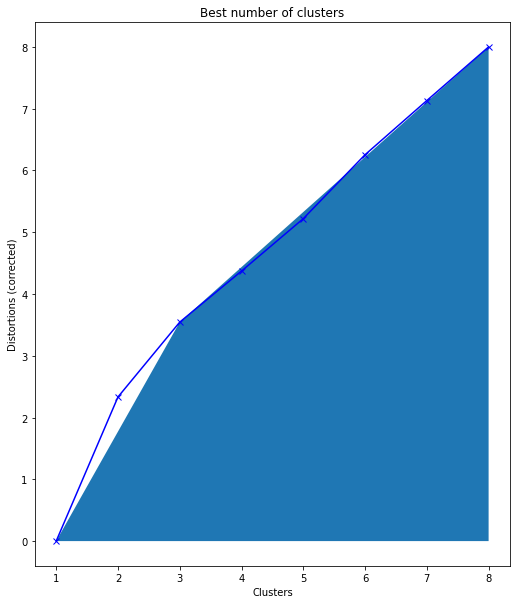

In [44]:
best_n_clusters = auto_clustering(distortions, method = 'kmeans')

In [45]:
model = KMeans(n_clusters = best_n_clusters, random_state = 13).fit(df_stand)
df_branches['Кластер'] = model.labels_
df_branches

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ,Кластер
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,1,5,1,1.00,49000,1,0,0,1
Филиал 2,80,18,1,0,20,0,0.95,24000,0,1,0,2
Филиал 3,240,54,3,0,10,1,1.05,125000,0,1,1,0
Филиал 4,160,57,1,0,30,0,1.00,85000,0,0,1,0
Филиал 5,270,68,2,1,15,1,1.05,130000,0,1,1,0
Филиал 6,100,28,1,0,10,1,0.95,42000,1,0,0,1
Филиал 7,130,20,1,-1,5,1,1.00,40000,0,0,0,1
Филиал 8,310,66,3,1,25,1,0.90,153000,0,1,1,0
Филиал 9,140,38,1,1,10,0,1.00,60000,0,1,1,2


In [46]:
df_kmeans_stand = df_stand.copy()
clusters_kmeans = df_branches['Кластер'].copy()

In [47]:
df_branches.groupby('Кластер').mean()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ
Кластер,,,,,,,,,,,
0,235.0,59.666667,2.500,0.166667,18.333333,0.833333,1.000000,112333.333333,0.166667,0.666667,0.666667
1,110.0,28.166667,0.500,-0.333333,16.666667,0.666667,0.966667,37166.666667,0.666667,0.000000,0.000000
2,150.0,32.500000,1.375,0.250000,11.875000,0.250000,1.000000,43250.000000,0.250000,1.000000,0.250000


In [48]:
df_branches.groupby('Кластер')['ПЛОЩАДЬ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,235.0,56.124861,160.0,195.0,245.0,265.0,310.0
1,6.0,110.0,15.491933,90.0,100.0,110.0,120.0,130.0
2,8.0,150.0,43.094580,80.0,125.0,155.0,175.0,210.0


In [49]:
df_branches.groupby('Кластер')['АССОРТИМ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,2.500,0.836660,1.0,2.25,3.0,3.0,3.0
1,6.0,0.500,0.547723,0.0,0.00,0.5,1.0,1.0
2,8.0,1.375,0.517549,1.0,1.00,1.0,2.0,2.0


In [50]:
df_branches.groupby('Кластер')['КОНКУРЕН'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,0.166667,0.752773,-1.0,0.0,0.0,0.75,1.0
1,6.0,-0.333333,0.816497,-1.0,-1.0,-0.5,0.00,1.0
2,8.0,0.250000,0.707107,-1.0,0.0,0.0,1.00,1.0


In [51]:
df_branches.groupby('Кластер')['МЕТРО'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,18.333333,9.831921,5.0,11.25,20.0,25.00,30.0
1,6.0,16.666667,12.110601,5.0,6.25,15.0,23.75,35.0
2,8.0,11.875000,5.303301,5.0,8.75,12.5,15.00,20.0


In [52]:
df_branches.groupby('Кластер')['КОНСУЛЬТ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,0.833333,0.408248,0.0,1.00,1.0,1.00,1.0
1,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0
2,8.0,0.250000,0.462910,0.0,0.00,0.0,0.25,1.0


In [53]:
df_branches.groupby('Кластер')['ЦЕНЫ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,1.000000,0.083666,0.90,0.9250,1.025,1.05,1.1
1,6.0,0.966667,0.040825,0.90,0.9500,0.975,1.00,1.0
2,8.0,1.000000,0.046291,0.95,0.9875,1.000,1.00,1.1


In [54]:
df_branches.groupby('Кластер')['ВЫВЕСКА'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,0.166667,0.408248,0.0,0.00,0.0,0.00,1.0
1,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0
2,8.0,0.250000,0.462910,0.0,0.00,0.0,0.25,1.0


In [55]:
df_branches.groupby('Кластер')['ВИТРИНА'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,0.666667,0.516398,0.0,0.25,1.0,1.0,1.0
1,6.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
2,8.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0


In [56]:
df_branches.groupby('Кластер')['СВЕТОВАЯ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0
1,6.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
2,8.0,0.250000,0.462910,0.0,0.00,0.0,0.25,1.0


In [57]:
df_branches.groupby('Кластер')['ПРОДАЖИ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
0,6.0,112333.333333,27811.268699,85000.0,88250.0,110000.0,128750.0,153000.0
1,6.0,37166.666667,9064.583094,22000.0,35000.0,37500.0,41500.0,49000.0
2,8.0,43250.000000,16926.310880,24000.0,31000.0,36500.0,61000.0,65000.0


### Вывод:
**Данные распределены примерно так же, как и при использовании иерархической кластеризации** 
Почему лучшее количество кластеров, вычисленное на основании auto_clustering все время разное. Что там вообще происходит в этой функции? 

### DBscan

In [58]:
df_branches = df_branches.drop('Кластер', axis = 1)

In [59]:
from sklearn.neighbors import NearestNeighbors

**Методом подбора и интуитивной оценки кластеров задаем m = 2**

In [94]:
m=2

model = NearestNeighbors(n_neighbors = m, algorithm = 'auto', metric = 'euclidean')
model.fit(df_stand)

NearestNeighbors(metric='euclidean', n_neighbors=2)

In [95]:
dist, _ = model.kneighbors(df_stand, n_neighbors = m, return_distance = True) 
dist = dist[:, -1] 
dist = np.sort(dist) 

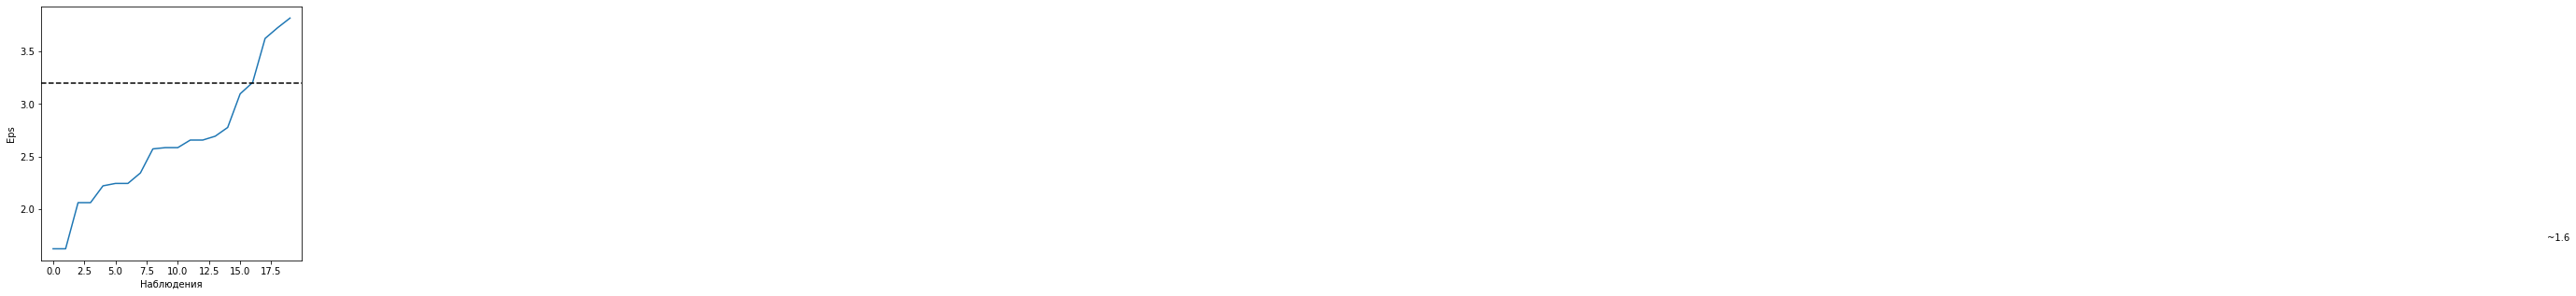

In [208]:
# Построение локтя
plt.figure(figsize = (5,5))
plt.plot(dist) 
plt.xlabel('Наблюдения')
plt.ylabel('Eps')
plt.axhline(3.2, c = 'k', linestyle = 'dashed') # Добавили нижнюю пунктирную линию
plt.text(200, 1.7, '~1.6') # Подписали нижнюю пунктирную линию
plt.show()

In [190]:
eps = 3.2

In [191]:
from sklearn.cluster import DBSCAN

In [192]:
dbscan = DBSCAN(eps = eps, min_samples = m, metric = 'euclidean', algorithm = 'auto')
dbscan.fit(df_stand)

DBSCAN(eps=3.2, min_samples=2)

In [193]:
labels = dbscan.labels_
df_branches['Кластер'] = labels

In [207]:
df_branches

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ,Кластер
НАЗВАНИЕ,,,,,,,,,,,,
Филиал 1,120,42,0,1,5,1,1.00,49000,1,0,0,0
Филиал 2,80,18,1,0,20,0,0.95,24000,0,1,0,0
Филиал 3,240,54,3,0,10,1,1.05,125000,0,1,1,1
Филиал 4,160,57,1,0,30,0,1.00,85000,0,0,1,-1
Филиал 5,270,68,2,1,15,1,1.05,130000,0,1,1,1
Филиал 6,100,28,1,0,10,1,0.95,42000,1,0,0,0
Филиал 7,130,20,1,-1,5,1,1.00,40000,0,0,0,0
Филиал 8,310,66,3,1,25,1,0.90,153000,0,1,1,-1
Филиал 9,140,38,1,1,10,0,1.00,60000,0,1,1,0


In [195]:
df_dbscan_stand = df_stand.copy()
clusters_dbscan = df_branches['Кластер'].copy()

In [196]:
df_branches.groupby('Кластер').size()

Кластер
-1     4
 0    12
 1     2
 2     2
dtype: int64

In [197]:
df_branches.groupby('Кластер').mean()

,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ЦЕНЫ,ПРОДАЖИ,ВЫВЕСКА,ВИТРИНА,СВЕТОВАЯ
Кластер,,,,,,,,,,,
-1,225.000000,59.000000,2.500000,0.000000,21.25,0.75,0.975000,104750.000000,0.250000,0.500000,0.500000
0,136.666667,30.833333,1.166667,0.166667,11.25,0.50,0.995833,41583.333333,0.416667,0.666667,0.166667
1,255.000000,61.000000,2.500000,0.500000,12.50,1.00,1.050000,127500.000000,0.000000,1.000000,1.000000
2,110.000000,29.500000,0.000000,-1.000000,30.00,0.00,0.925000,35000.000000,0.500000,0.000000,0.000000


In [204]:
df_branches.groupby('Кластер')['ПЛОЩАДЬ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
-1,4.0,225.000000,68.556546,160.0,175.0,215.0,265.0,310.0
0,12.0,136.666667,40.750534,80.0,107.5,130.0,170.0,210.0
1,2.0,255.000000,21.213203,240.0,247.5,255.0,262.5,270.0
2,2.0,110.000000,14.142136,100.0,105.0,110.0,115.0,120.0


In [205]:
df_branches.groupby('Кластер')['ПРОДАЖИ'].describe()

,count,mean,std,min,25%,50%,75%,max
Кластер,,,,,,,,
-1,4.0,104750.000000,32479.480702,85000.0,85750.0,90500.0,109500.0,153000.0
0,12.0,41583.333333,14981.554315,22000.0,31000.0,38500.0,51750.0,65000.0
1,2.0,127500.000000,3535.533906,125000.0,126250.0,127500.0,128750.0,130000.0
2,2.0,35000.000000,0.000000,35000.0,35000.0,35000.0,35000.0,35000.0


### Вывод по методу DBScan:
Проанализировав результат кластеризации данным методом, я пришел к выводу, что он не совсем подходит для поставленной задачи, т.к. нет четкого разбиения на несколько кластеров и, по сути, присутствует один большой кластер, который нельзя четко поделить на более мелкие

### Метод главных компонент
Используя метод главных компонент визуализируем зависимость продаж от всех признаков на плоскости. И проверим точность кластеризации после обоих методов.

**Проверим данные иерархической кластеризации**

In [198]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_hierarch = pca.fit_transform(df_hierarch_stand)

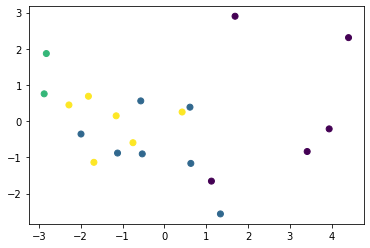

In [199]:
colors = {'0':'red','1':'green','2':'blue','3':'yellow'}
plt.scatter(pca_hierarch.T[0], pca_hierarch.T[1], c = clusters_hierarch.replace(colors))

**Проверим данные кластеризации методом K-means**

In [200]:
pca_kmeans = pca.fit_transform(df_kmeans_stand)

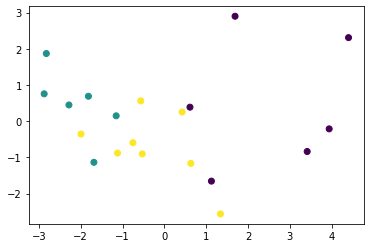

In [201]:
colors = {'0':'red','1':'green','2':'blue','3':'yellow'}
plt.scatter(pca_kmeans.T[0], pca_kmeans.T[1], c = clusters_kmeans.replace(colors))

**Проверим данные кластеризации методом DBScan**

In [202]:
pca_dbscan = pca.fit_transform(df_dbscan_stand)

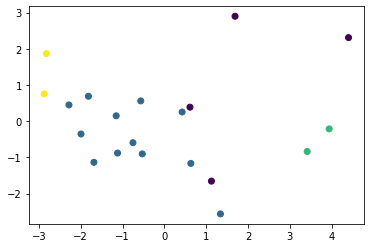

In [203]:
colors = {'0':'red','1':'green','2':'blue','3':'yellow','-1':'black'}
plt.scatter(pca_dbscan.T[0], pca_dbscan.T[1], c = clusters_dbscan.replace(colors))

### Вывод по методу координат:
Данный метод действительно удобен для отображения получившихся кластеров, хоть и есть некоторые вопросы к расположению. Например на последнем графике отчетливо видны точки, которые равноудалены от основного скопления, но одни принадлежат кластеру, а другие хоть и находятся ближе - отмечены выбросами.  